In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



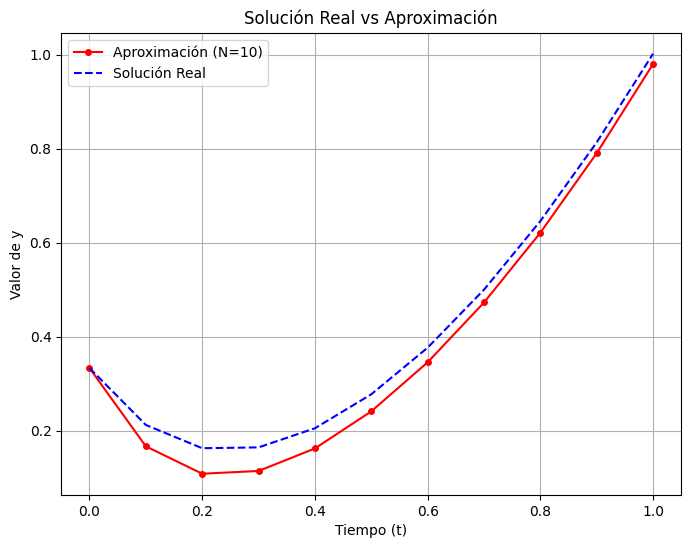

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from src import ODE_euler

# Definir la ecuación diferencial
def funcion_ecuacion(t, y):
    return -5 * y + 5 * t**2 + 2 * t

# Definir la solución exacta
def solucion_exacta(t):
    return t**2 + (1/3) * np.exp(-5*t)

# Parámetros del problema
t_inicial, t_final = 0, 1
y_inicial = 1 / 3
N = 10

# Resolver con el método de Euler
y_aprox, t_malla, paso_h = ODE_euler(a=t_inicial, b=t_final, f=funcion_ecuacion, y_t0=y_inicial, N=N)

# Valores de la solución exacta en los puntos de Euler
y_real = [solucion_exacta(t) for t in t_malla]

plt.figure(figsize=(8,6))
plt.plot(t_malla, y_aprox, marker="o", linestyle="-", markersize=4, label=f"Aproximación (N={N})", color="red")
plt.plot(t_malla, y_real, linestyle="--", color="blue", label="Solución Real")
plt.xlabel("Tiempo (t)")
plt.ylabel("Valor de y")
plt.title("Solución Real vs Aproximación")
plt.legend()
plt.grid(True)
plt.show()


# Errores
Calcule el error relativo para diferentes valores de N.

In [17]:
# Calcular error relativo
# Intervalo y condición inicial
t_inicial, t_final = 0, 1  
y_inicial = 1 / 3  

# Función de la ecuación diferencial
def funcion_ecuacion(t, y):
    return -5 * y + 5 * t**2 + 2 * t

# Función de la solución exacta
def solucion_exacta(t):
    return t**2 + (1/3) * np.exp(-5*t)

# Definir los valores de N a analizar
valores_N = [5, 10, 20]

# Diccionario para almacenar los errores relativos promedio
errores_promedio = {}

# Calcular el error relativo promedio para cada N
for N in valores_N:
    y_aprox, t_malla, paso_h = ODE_euler(a=t_inicial, b=t_final, f=funcion_ecuacion, y_t0=y_inicial, N=N)
    y_real = [solucion_exacta(t) for t in t_malla]
    
    errores_relativos = [abs((y_r - y_a) / y_r) * 100 for y_r, y_a in zip(y_real, y_aprox)]
    errores_promedio[N] = np.mean(errores_relativos)  # Promedio del error relativo


errores_promedio

{5: np.float64(27.979090816735752),
 10: np.float64(12.909541068138493),
 20: np.float64(6.314569684056269)}